In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import datetime
import torch
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [8]:
url = 'https://raw.githubusercontent.com/Thomas101Shen/Dynamic_hedging/refs/heads/main/Option_SPX.csv'
data = pd.read_csv(url)

print(data.shape)
data.dropna(inplace=True)
print(data.shape)
print(data.head())

X = data[['Moneyness', 'TTM', 'D_BS']]
y = data[['Target']]

print(f'\n\nFeatures:\n {X.describe()} \n\n\n Test data:\n {y.describe()}')

(1008, 14)
(1008, 14)
         Date  ID  Days until next hedge        S  Dividend        C_BS  \
0  2024-10-09   1                      1  5792.04    1.3255  347.319191   
1  2024-08-12   3                      1  5344.39    1.4375   65.911689   
2  2024-08-05   5                      1  5186.33    1.4816   29.540325   
3  2024-11-15   1                      3  5870.62    1.3163  351.552064   
4  2024-09-17   6                      1  5634.58    1.3645   46.314393   

       D_BS   C_mkt  D_Blm        R  TTM  Moneyness  D_Optimal    Target  
0  0.630024  357.80  0.642  4.78852  163      92.04   0.385249 -0.244775  
1  0.227086   74.05  0.247  4.96403  221    -555.61   0.228776  0.001690  
2  0.111161   38.45  0.132  4.95853  228    -913.67  -0.159851 -0.271012  
3  0.685499  370.40  0.710  4.77039  126     170.62   0.377866 -0.307633  
4  0.185447   54.15  0.208  4.76338  185    -565.42   0.160314 -0.025133  


Features:
          Moneyness          TTM         D_BS
count  1008.000000 

         Moneyness          TTM         D_BS
count  1008.000000  1008.000000  1008.000000
mean   -235.458214   124.095238     0.376424
std     262.068916    57.098591     0.203848
min   -1013.670000    18.000000     0.029593
25%    -403.175000    78.750000     0.208732
50%    -218.595000   124.500000     0.364226
75%     -52.537500   169.250000     0.524479
max     347.150000   228.000000     0.948629

Skew: 
Moneyness   -0.234378
TTM          0.003353
D_BS         0.337676
dtype: float64

Kurtosis: 
Moneyness   -0.237599
TTM         -0.964705
D_BS        -0.646047
dtype: float64


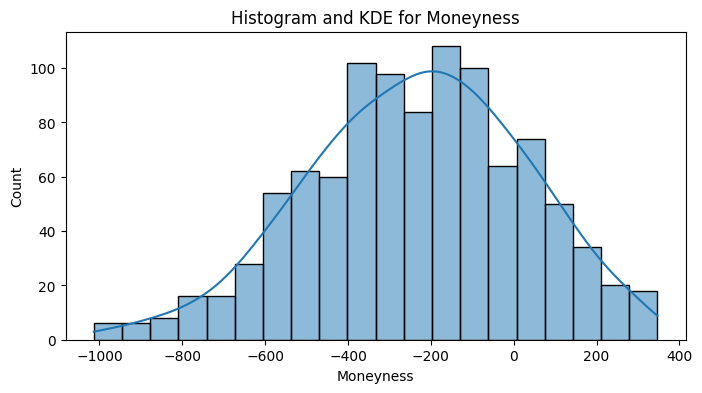

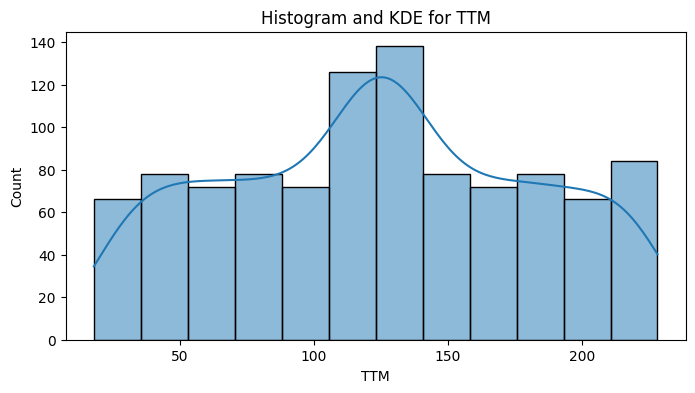

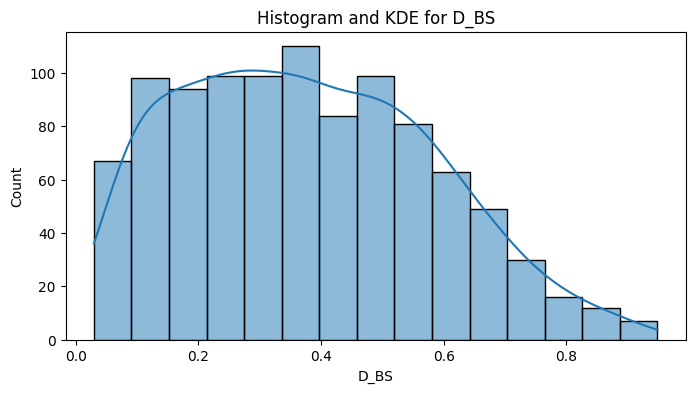

            Target
count  1008.000000
mean     -0.254678
std       3.233856
min     -40.533411
25%      -0.123975
50%      -0.033288
75%       0.067694
max       8.216118

Skew: 
Target   -8.577093
dtype: float64

Kurtosis: 
Target    84.230278
dtype: float64


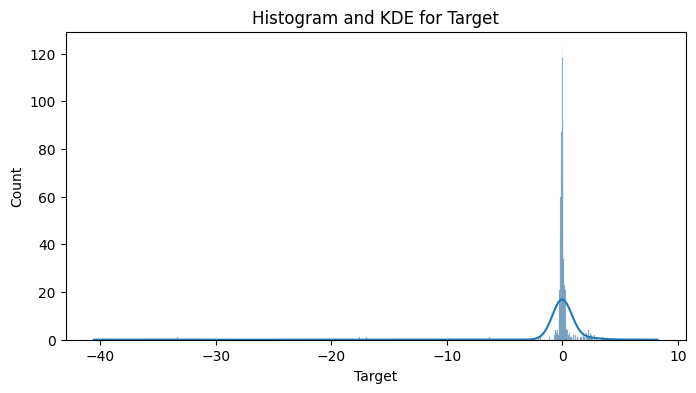

In [9]:
def describe_data(df):
    print(df.describe())
    print("\nSkew: ")
    print(df.skew())
    print("\nKurtosis: ")
    print(df.kurtosis())
    for column in df.columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[column], kde=True)
        plt.title(f'Histogram and KDE for {column}')
        plt.show()

describe_data(X)
describe_data(y)

In [10]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# print(type(y_train_val))

<class 'pandas.core.frame.DataFrame'>


In [11]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

In [12]:
def plot_train_test(train, test):
    columns = train.columns.tolist()
    # print(train.min(), test.min(), train.max(), test.max())
    for column in columns:
        plt.hist(train[column], bins=30, alpha=0.5
                 , label=f'Training data for {column}')
        plt.hist(test[column], bins=30, alpha=0.5, label=f'Test data for {column}')
        plt.legend()
        plt.title(f'Distribution of {column}')
        plt.show()

# print(X_train.min())


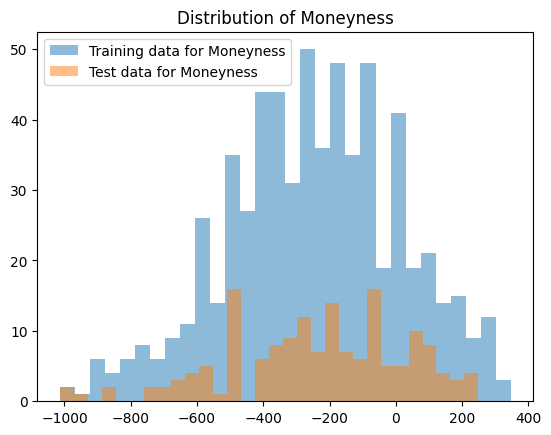

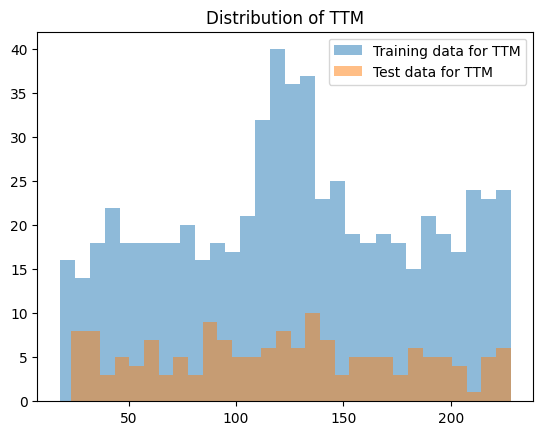

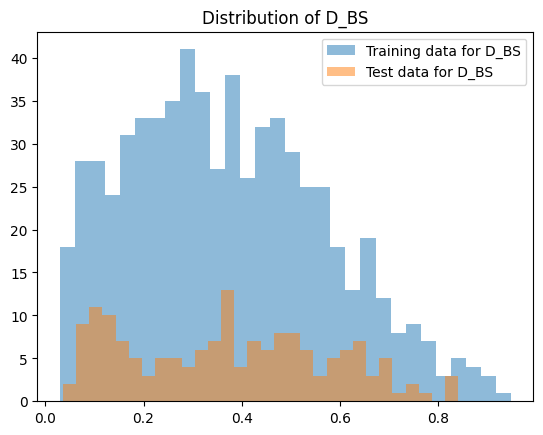

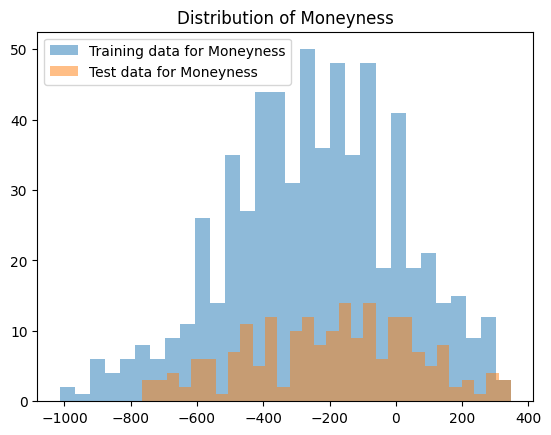

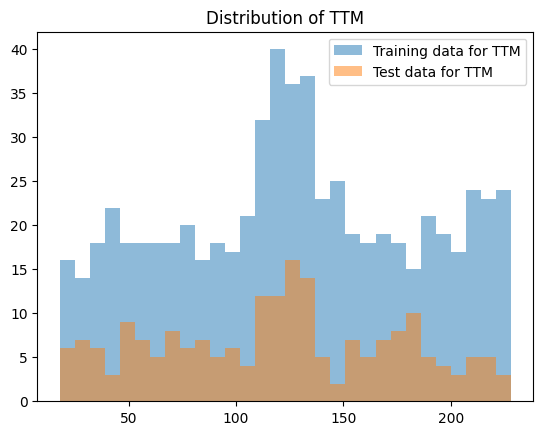

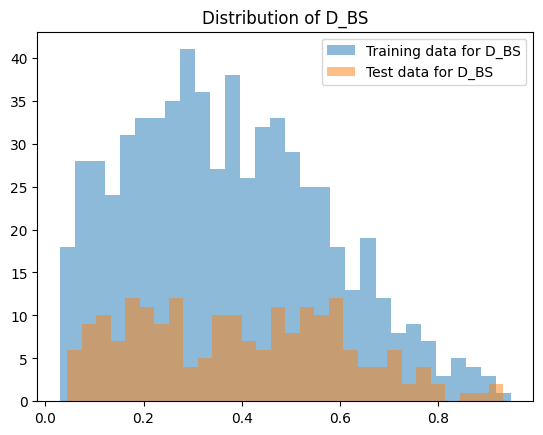

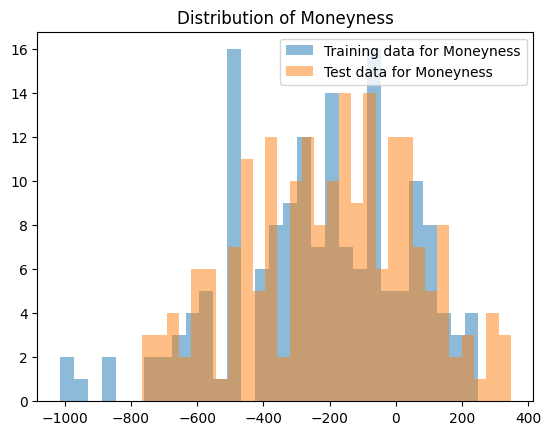

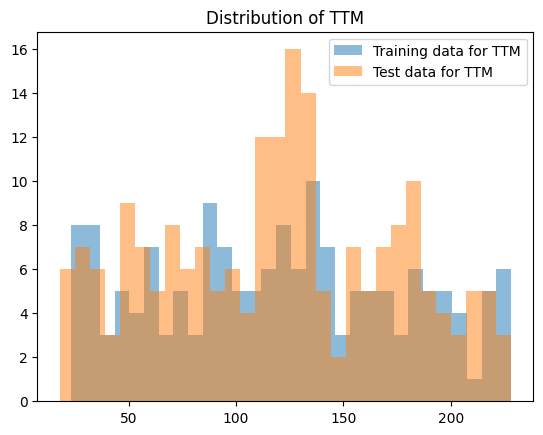

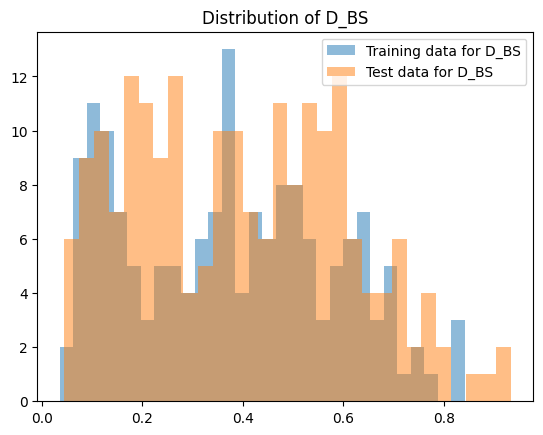

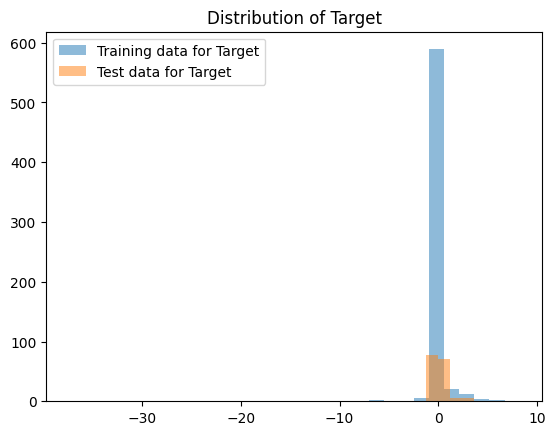

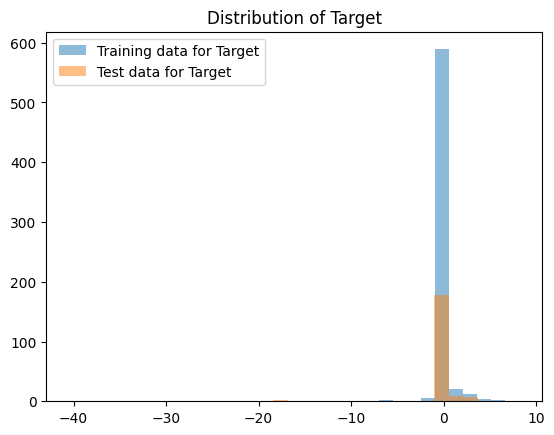

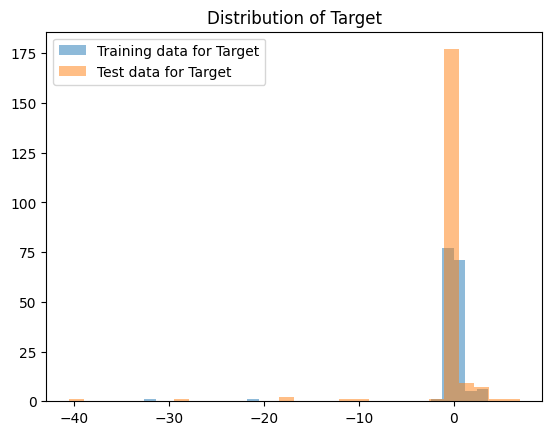

In [13]:
plot_train_test(X_train, X_val)
print("\n\n\n\n\n\n")
plot_train_test(X_train, X_test)
print("\n\n\n\n\n\n")
plot_train_test(X_val, X_test)
print("\n\n\n\n\n\n")

plot_train_test(y_train, y_val)
print("\n\n\n\n\n\n")
plot_train_test(y_train, y_test)
print("\n\n\n\n\n\n")
plot_train_test(y_val, y_test)  # Make note this is comparing the val to test

In [14]:
scaler = MinMaxScaler()

datasets = {
    "X_train": X_train,
    "X_val": X_val,
    "X_test": X_test,
}

for key in datasets:
    datasets[key] = scaler.fit_transform(datasets[key])

feat_cols = ['Moneyness', 'TTM', 'D_BS']

X_train = pd.DataFrame(datasets["X_train"], columns=feat_cols)
X_test = pd.DataFrame(datasets["X_test"], columns=feat_cols)
X_val = pd.DataFrame(datasets["X_val"], columns=feat_cols)

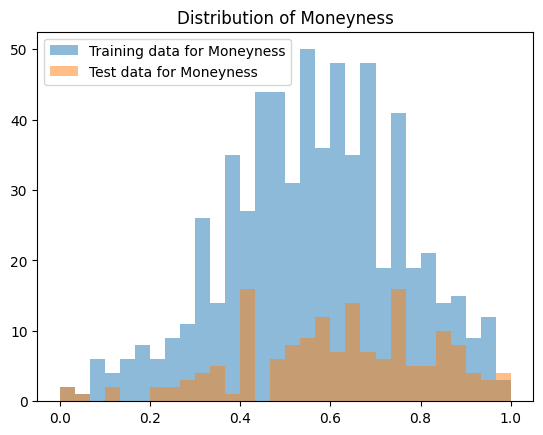

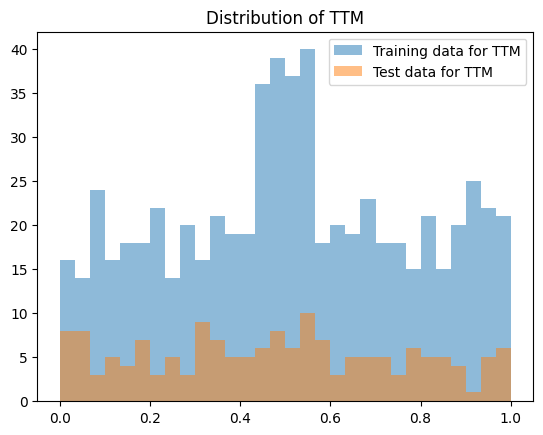

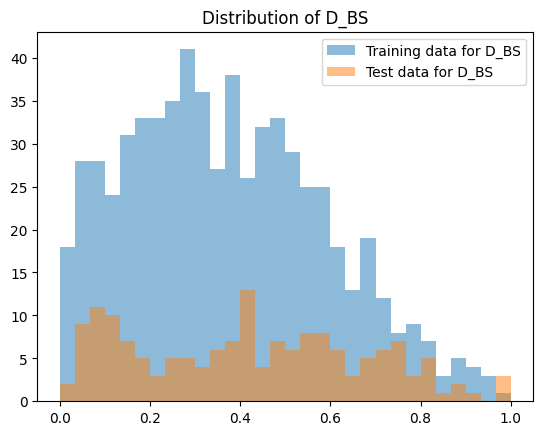

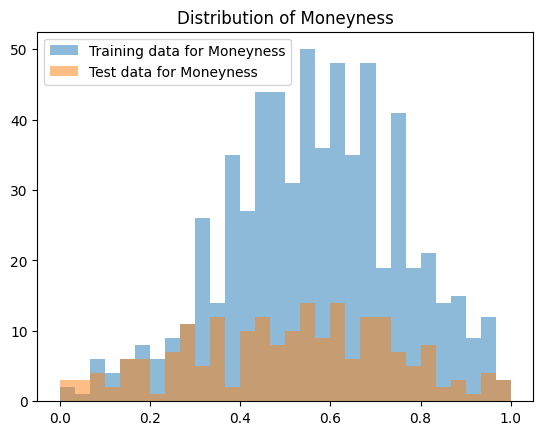

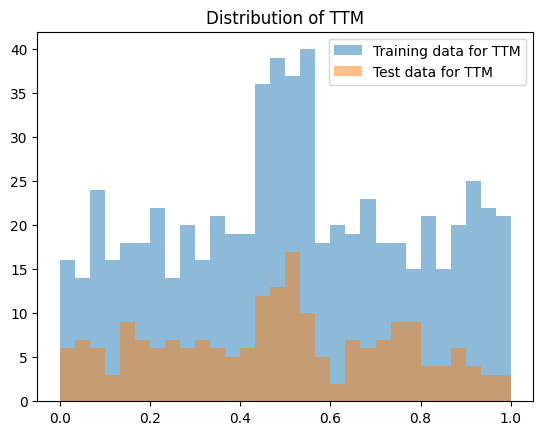

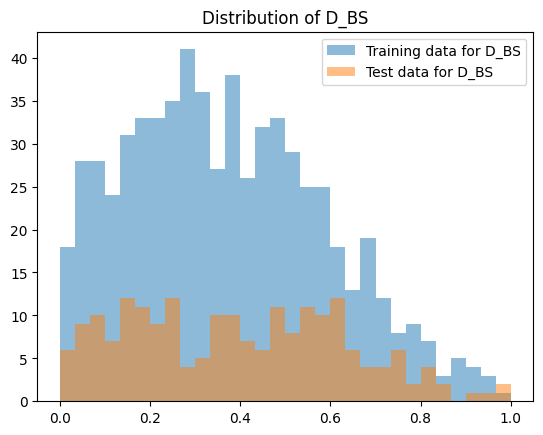

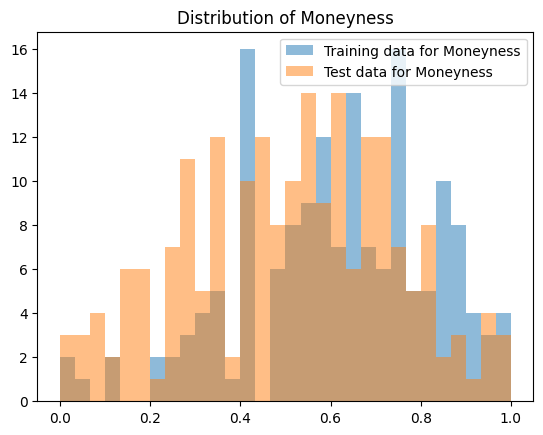

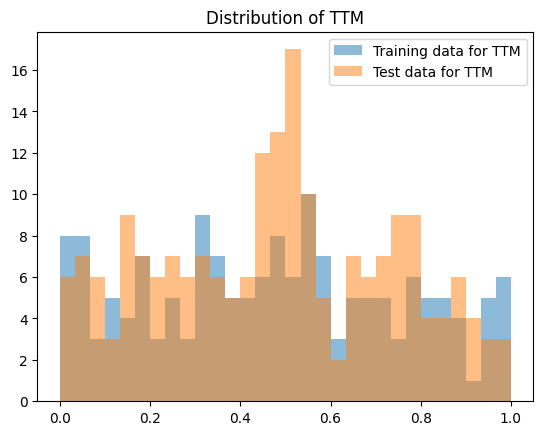

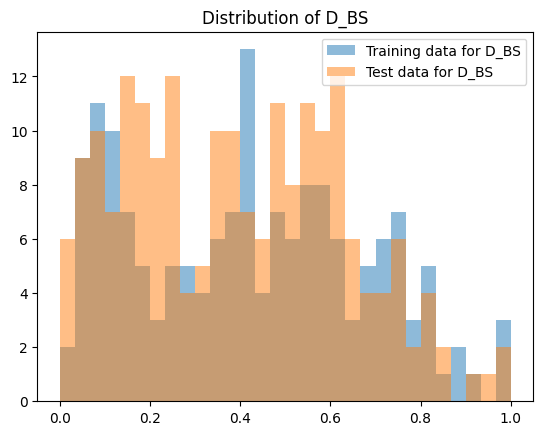

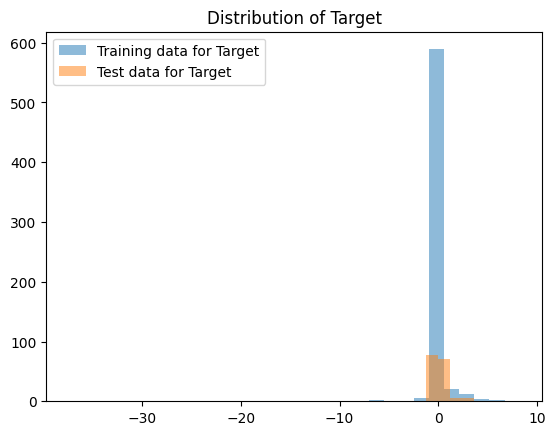

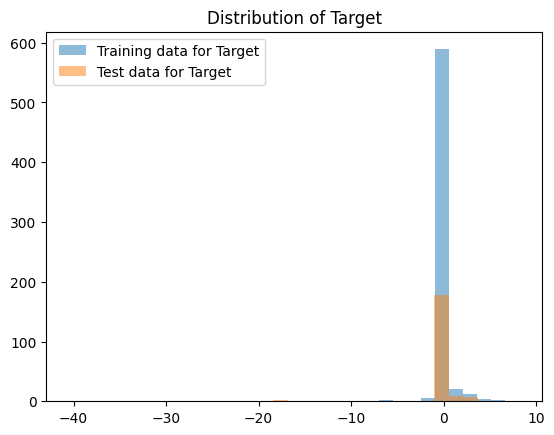

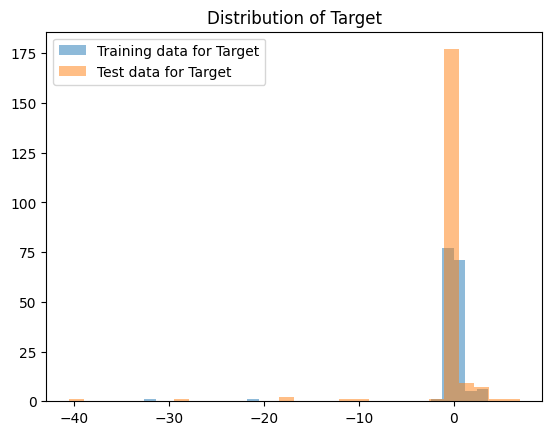

In [15]:
plot_train_test(X_train, X_val)
print("\n\n\n\n\n\n")
plot_train_test(X_train, X_test)
print("\n\n\n\n\n\n")
plot_train_test(X_val, X_test)
print("\n\n\n\n\n\n")

plot_train_test(y_train, y_val)
print("\n\n\n\n\n\n")
plot_train_test(y_train, y_test)
print("\n\n\n\n\n\n")
plot_train_test(y_val, y_test)  # Make note this is comparing the val to test

In [16]:
import torch.nn as nn
import torch.optim as optim


class FNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FNN, self).__init__()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.activation = nn.ReLU()
        self.output = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.hidden(x)
        x = self.activation(x)
        x = self.output(x)
        return x


input_size = 3
hidden_size = 6
output_size = 1

In [17]:
model = FNN(input_size, hidden_size, output_size)
loss_func = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

X_train = torch.tensor(X_train.values, dtype=torch.float)
X_test = torch.tensor(X_test.values, dtype=torch.float)
X_val = torch.tensor(X_val.values, dtype=torch.float)

y_train = torch.tensor(y_train.values, dtype=torch.float)
y_test = torch.tensor(y_test.values, dtype=torch.float)
y_val = torch.tensor(y_val.values, dtype=torch.float)

In [18]:
def train_model(model, epochs):
    patience = 5
    best_val_loss = float('inf')
    for epoch in range(epochs):
        model.train()
        predictions_train = model(X_train)
        loss_train = loss_func(predictions_train, y_train)
    
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
    
        model.eval()
        with torch.no_grad():
            predictions_val = model(X_val)
            loss_val = loss_func(predictions_val, y_val)
    
        # Check for improvement
        if loss_val < best_val_loss:
            best_val_loss = loss_val
            wait = 0
        else:
            wait += 1
            if wait >= patience:
                print("Early stoppage")
                print(f"Epoch [{epoch+1}/{epochs}], Training Loss: {loss_train.item():.4f}, Validation Loss: {loss_val.item():.4f}")
                break
                
        # if (epoch + 1) % 5 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Training Loss: {loss_train.item():.4f}, Validation Loss: {loss_val.item():.4f}")

train_model(model, 100)

Epoch [1/100], Training Loss: 8.7380, Validation Loss: 9.7432
Epoch [2/100], Training Loss: 8.7175, Validation Loss: 9.7281
Epoch [3/100], Training Loss: 8.7010, Validation Loss: 9.7151
Epoch [4/100], Training Loss: 8.6874, Validation Loss: 9.7041
Epoch [5/100], Training Loss: 8.6772, Validation Loss: 9.6955
Epoch [6/100], Training Loss: 8.6702, Validation Loss: 9.6886
Epoch [7/100], Training Loss: 8.6643, Validation Loss: 9.6826
Epoch [8/100], Training Loss: 8.6592, Validation Loss: 9.6773
Epoch [9/100], Training Loss: 8.6554, Validation Loss: 9.6726
Epoch [10/100], Training Loss: 8.6524, Validation Loss: 9.6687
Epoch [11/100], Training Loss: 8.6503, Validation Loss: 9.6654
Epoch [12/100], Training Loss: 8.6488, Validation Loss: 9.6627
Epoch [13/100], Training Loss: 8.6478, Validation Loss: 9.6606
Epoch [14/100], Training Loss: 8.6473, Validation Loss: 9.6588
Epoch [15/100], Training Loss: 8.6471, Validation Loss: 9.6573
Epoch [16/100], Training Loss: 8.6472, Validation Loss: 9.6559
E

In [19]:
model.eval()
with torch.no_grad():
    predictions = model(X_test)
    test_loss = loss_func(predictions, y_test)
    
    print(f"Test Loss: {test_loss.item():.4f}")

Test Loss: 16.7085


In [ ]:
mse_greeks = 